# Simple Policy Optimization
Notebook for trying out the tooling involved in using policy gradient methods to train a model on SpaceInvaders.

In [3]:
import tensorflow as tf
import tensorflow_probability as tfp
import gym
import matplotlib.pyplot as plt
tfd = tfp.distributions
%matplotlib inline

In [4]:
tf.__version__

'2.1.0'

In [25]:
tf.executing_eagerly()

True

In [5]:
tfp.__version__

'0.9.0'

# Create Space Invaders environment 

In [6]:
env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

In [7]:
env.observation_space

Box(210, 160, 3)

In [23]:
env.observation_space.shape

(210, 160, 3)

In [16]:
env.action_space

Discrete(6)

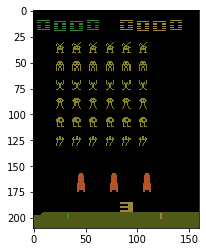

In [12]:
_ = plt.imshow(env.reset())

In [20]:
# Sampling from action space randomly
tfd.Multinomial(total_count=1, logits=[-1.] * env.action_space.n).sample(1)

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=array([[0., 1., 0., 0., 0., 0.]], dtype=float32)>

# Observation state preproscessing
We want to take say 3-4 frames from environment as input to the policy, so that we are able to determine the direction of which way things are moving.

For space invaders we know that the colour isn't important (fun fact: original arcade machine was black and white 
and used physical filter to give things different colours) so we can reduce each input frame to a 1 channel matrix.

We can also crop out the score to reduce the number of things the policy needs to care about.

(210, 160, 3)
uint8


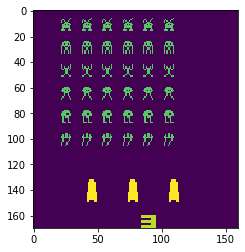

In [40]:
img = env.reset()
print(img.shape)
print(img.dtype)
_ = plt.imshow(tf.math.reduce_max(img, axis=2)[25:195, :])

# Next step: create h x w x n_frame tensor 
We can implement sequence of frames by allocating an initial h x w x n_frame tensor and for each new frame
rolling the tensor along axis 2 then assigning the new frame to channel 0. Is there a better or more idiomatic way to do this?